In [1]:
#general DS imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import env
import acquire
import prepare

In [2]:
#decisions tree and model eval imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [3]:
#get titanic dataset using acquire.py file
#acquire.get_titanic_data()

# Titanic data

# Question: Can we predict how many passengers boarded the Titanic alone based on the Titanic data?

> Baseline Prediction: Every person who boarded the Titanic was alone.



In [4]:
np.random.seed(123)
titanic = acquire.get_titanic_data()
titanic = prepare.clean_titanic_data(titanic)
titanic['alone'] = titanic['alone'].astype('bool').astype('str')
#titanic = prepare.clean_titanic_data(titanic)

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.2500,Southampton,False,1,0,1
1,1,1,female,38.0,1,0,71.2833,Cherbourg,False,0,0,0
2,1,3,female,26.0,0,0,7.9250,Southampton,True,0,0,1
3,1,1,female,35.0,1,0,53.1000,Southampton,False,0,0,1
4,0,3,male,35.0,0,0,8.0500,Southampton,True,1,0,1


In [6]:
#titanic = pd.get_dummies(titanic, columns=['sex','class','alive'], drop_first=True)
#titanic.head()

In [7]:
x = titanic[['survived','sex_male', 'fare','pclass', 'embark_town_Queenstown','embark_town_Southampton']]
y = titanic.alone

x_train_and_validate, x_test, y_train_and_validate, y_test = train_test_split(x,y, random_state=123, test_size=.3)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [8]:
x_train.head()

,survived,sex_male,fare,pclass,embark_town_Queenstown,embark_town_Southampton
456,0,1,26.5500,1,0,1
8,1,0,11.1333,3,0,1
19,1,0,7.2250,3,0,0
95,0,1,8.0500,3,0,1
86,0,1,34.3750,3,0,1


In [9]:
y_train[:5]

456     True
8      False
19      True
95      True
86     False
Name: alone, dtype: object

In [10]:
y_train.value_counts()

True     309
False    189
Name: alone, dtype: int64

> Baseline Accuray: 309 Actual True / 498 Baseline True

> Accuracy = 62%

## Decision Tree Modeling

In [11]:
tree = DecisionTreeClassifier(max_depth = 3)

In [12]:
tree.fit(x_train, y_train)

print(export_text(tree, feature_names=x_train.columns.tolist()))

|--- fare <= 13.68
|   |--- pclass <= 2.50
|   |   |--- class: True
|   |--- pclass >  2.50
|   |   |--- fare <= 10.82
|   |   |   |--- class: True
|   |   |--- fare >  10.82
|   |   |   |--- class: False
|--- fare >  13.68
|   |--- pclass <= 1.50
|   |   |--- fare <= 50.99
|   |   |   |--- class: True
|   |   |--- fare >  50.99
|   |   |   |--- class: False
|   |--- pclass >  1.50
|   |   |--- sex_male <= 0.50
|   |   |   |--- class: False
|   |   |--- sex_male >  0.50
|   |   |   |--- class: False



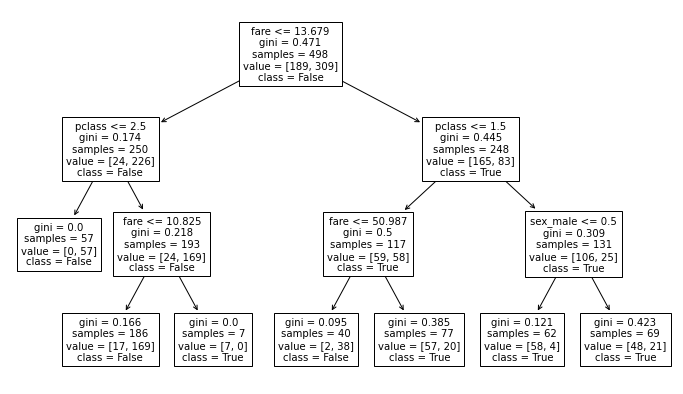

In [13]:
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=x_train.columns, class_names = y_train.unique())
plt.show()

In [14]:
tree.predict(x_train)

array(['True', 'False', 'True', 'True', 'False', 'False', 'True', 'True',
       'False', 'True', 'True', 'True', 'True', 'False', 'True', 'True',
       'True', 'True', 'True', 'True', 'False', 'False', 'False', 'True',
       'False', 'False', 'False', 'False', 'True', 'False', 'True',
       'False', 'False', 'True', 'True', 'False', 'False', 'True', 'True',
       'False', 'True', 'True', 'False', 'True', 'True', 'True', 'True',
       'True', 'True', 'True', 'False', 'True', 'False', 'True', 'True',
       'True', 'True', 'False', 'True', 'True', 'False', 'True', 'True',
       'True', 'True', 'True', 'True', 'True', 'True', 'False', 'False',
       'True', 'True', 'True', 'True', 'False', 'False', 'False', 'False',
       'True', 'True', 'True', 'False', 'True', 'True', 'True', 'False',
       'True', 'True', 'False', 'True', 'True', 'True', 'True', 'True',
       'False', 'True', 'False', 'False', 'False', 'True', 'True', 'True',
       'True', 'True', 'True', 'False', 'True', '

In [15]:
predictions = tree.predict(x_train)
actual = y_train

In [16]:
confusion_matrix(actual, predictions)

array([[170,  19],
       [ 45, 264]])

In [17]:
pd.crosstab(actual, predictions)

col_0,False,True
alone,,
False,170,19
True,45,264


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


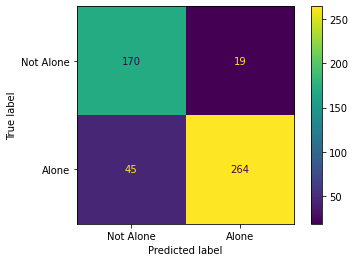

In [18]:
plot_confusion_matrix(tree, x_train, y_train, display_labels=['Not Alone', 'Alone'])

In [19]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

       False       0.79      0.90      0.84       189
        True       0.93      0.85      0.89       309

    accuracy                           0.87       498
   macro avg       0.86      0.88      0.87       498
weighted avg       0.88      0.87      0.87       498



In [20]:
predictions = tree.predict(x_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

       False       0.76      0.85      0.80        53
        True       0.88      0.81      0.84        72

    accuracy                           0.82       125
   macro avg       0.82      0.83      0.82       125
weighted avg       0.83      0.82      0.82       125



In [21]:
predictions = tree.predict(x_test)
actual = y_test

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

       False       0.85      0.93      0.89       112
        True       0.94      0.88      0.91       156

    accuracy                           0.90       268
   macro avg       0.90      0.90      0.90       268
weighted avg       0.90      0.90      0.90       268



# Telco data

# Question: Can we predict how many customers churned when they did not have internet service based on the Telco data?

> Baseline Prediction: Customers churned when they did not have internet service.

In [22]:
telco = acquire.get_telco_data()
telco

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [23]:
x_train = telco[['internet_service_type_Fiber optic', 'internet_service_type_None','senior_citizen','tenure']]
y_train = telco['churn_Yes']

KeyError: "['internet_service_type_Fiber optic', 'internet_service_type_None'] not in index"

In [ ]:
tree = DecisionTreeClassifier(max_depth = 3)

In [ ]:
tree.fit(x_train, y_train)

print(export_text(tree, feature_names=x_train.columns.tolist()))